In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [48]:
data = pd.read_csv("3w.csv")

Features and Target variables

In [49]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# FOR LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','2W','3W']].values
target = data['SD'].values

Normalize data

In [50]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [52]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [53]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/300
20/20 [==============================] - 2s 16ms/step - loss: 305.7953 - val_loss: 326.1792
Epoch 2/300
20/20 [==============================] - 0s 4ms/step - loss: 292.6472 - val_loss: 282.3189
Epoch 3/300
20/20 [==============================] - 0s 5ms/step - loss: 126.1954 - val_loss: 56.9695
Epoch 4/300
20/20 [==============================] - 0s 4ms/step - loss: 42.6011 - val_loss: 56.0465
Epoch 5/300
20/20 [==============================] - 0s 4ms/step - loss: 37.8346 - val_loss: 55.7502
Epoch 6/300
20/20 [==============================] - 0s 4ms/step - loss: 37.2540 - val_loss: 55.3411
Epoch 7/300
20/20 [==============================] - 0s 4ms/step - loss: 37.2706 - val_loss: 55.4106
Epoch 8/300
20/20 [==============================] - 0s 4ms/step - loss: 37.7609 - val_loss: 55.8124
Epoch 9/300
20/20 [==============================] - 0s 4ms/step - loss: 37.5848 - val_loss: 56.3268
Epoch 10/300
20/20 [==============================] - 0s 4ms/step - loss: 38.2876 - v

Visualize LSTM results

0.6222864740894956


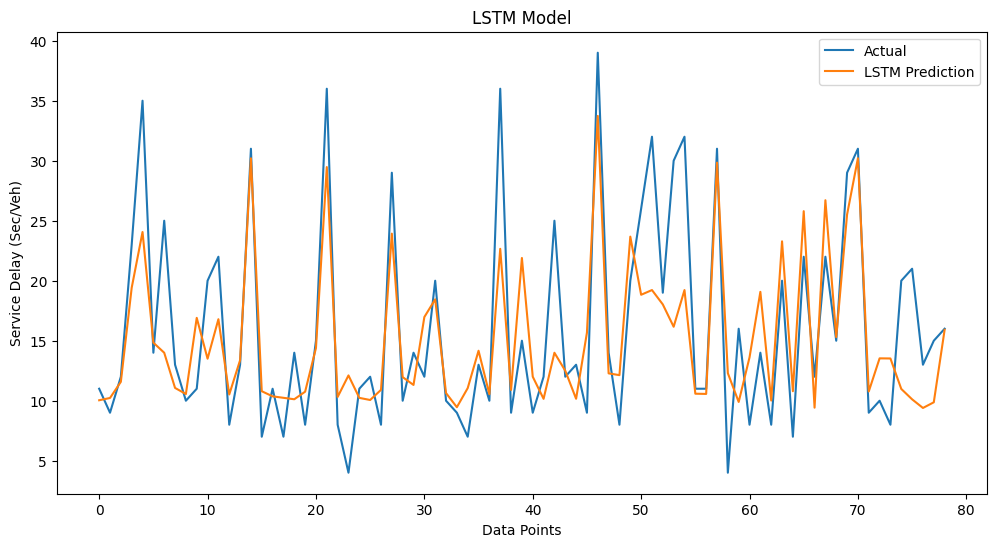

In [54]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [97]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/300
20/20 [==============================] - 3s 23ms/step - loss: 299.7856 - val_loss: 305.2351
Epoch 2/300
20/20 [==============================] - 0s 4ms/step - loss: 189.3788 - val_loss: 57.2526
Epoch 3/300
20/20 [==============================] - 0s 6ms/step - loss: 39.2332 - val_loss: 33.0429
Epoch 4/300
20/20 [==============================] - 0s 5ms/step - loss: 30.1404 - val_loss: 31.0070
Epoch 5/300
20/20 [==============================] - 0s 5ms/step - loss: 27.4411 - val_loss: 32.4127
Epoch 6/300
20/20 [==============================] - 0s 5ms/step - loss: 27.3089 - val_loss: 30.5185
Epoch 7/300
20/20 [==============================] - 0s 5ms/step - loss: 26.6586 - val_loss: 30.6333
Epoch 8/300
20/20 [==============================] - 0s 4ms/step - loss: 27.7362 - val_loss: 31.1215
Epoch 9/300
20/20 [==============================] - 0s 6ms/step - loss: 27.9884 - val_loss: 31.4455
Epoch 10/300
20/20 [==============================] - 0s 5ms/step - loss: 31.3158 - val

Visualize BiLSTM results

0.6426945458765065


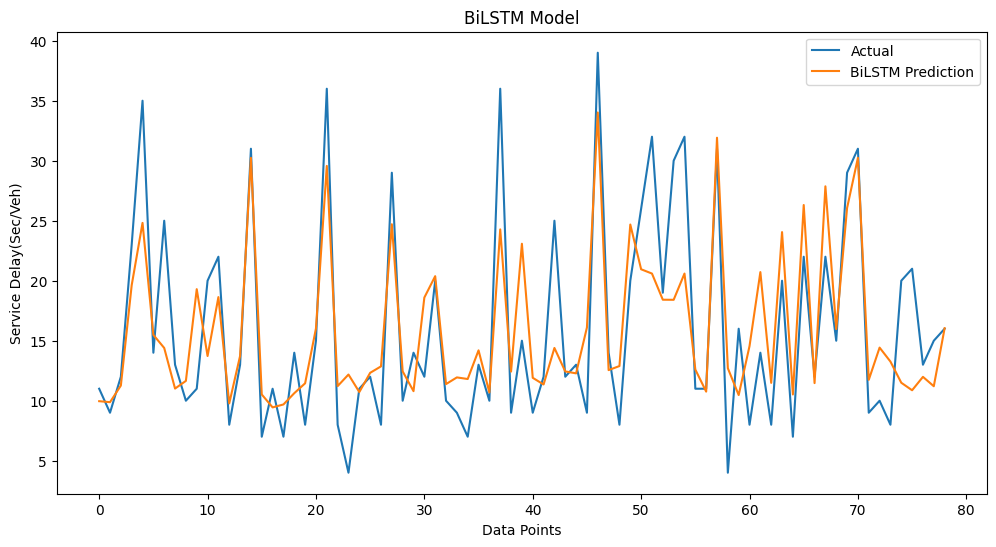

In [98]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [57]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/800
20/20 [==============================] - 2s 14ms/step - loss: 300.9200 - val_loss: 312.1833
Epoch 2/800
20/20 [==============================] - 0s 4ms/step - loss: 238.4408 - val_loss: 128.6013
Epoch 3/800
20/20 [==============================] - 0s 4ms/step - loss: 54.1312 - val_loss: 64.6590
Epoch 4/800
20/20 [==============================] - 0s 4ms/step - loss: 41.6118 - val_loss: 55.3295
Epoch 5/800
20/20 [==============================] - 0s 5ms/step - loss: 37.2246 - val_loss: 50.9862
Epoch 6/800
20/20 [==============================] - 0s 4ms/step - loss: 35.7595 - val_loss: 50.9289
Epoch 7/800
20/20 [==============================] - 0s 4ms/step - loss: 36.1764 - val_loss: 49.7565
Epoch 8/800
20/20 [==============================] - 0s 4ms/step - loss: 35.0950 - val_loss: 51.3345
Epoch 9/800
20/20 [==============================] - 0s 4ms/step - loss: 35.6047 - val_loss: 51.5874
Epoch 10/800
20/20 [==============================] - 0s 4ms/step - loss: 34.8150 - va

Visualize GRU results

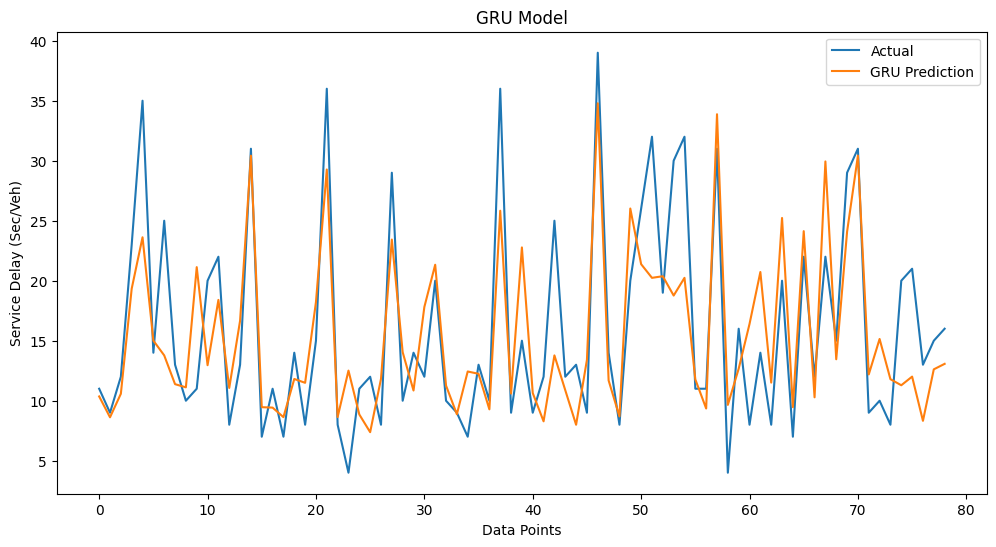

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [99]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=300, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/300
20/20 [==============================] - 3s 22ms/step - loss: 294.4033 - val_loss: 289.0146
Epoch 2/300
20/20 [==============================] - 0s 5ms/step - loss: 159.6232 - val_loss: 71.6453
Epoch 3/300
20/20 [==============================] - 0s 6ms/step - loss: 45.9352 - val_loss: 36.9802
Epoch 4/300
20/20 [==============================] - 0s 5ms/step - loss: 34.2311 - val_loss: 32.7004
Epoch 5/300
20/20 [==============================] - 0s 5ms/step - loss: 28.8051 - val_loss: 33.6938
Epoch 6/300
20/20 [==============================] - 0s 7ms/step - loss: 29.4097 - val_loss: 38.5796
Epoch 7/300
20/20 [==============================] - 0s 6ms/step - loss: 29.9321 - val_loss: 30.5966
Epoch 8/300
20/20 [==============================] - 0s 5ms/step - loss: 28.2598 - val_loss: 30.6455
Epoch 9/300
20/20 [==============================] - 0s 5ms/step - loss: 27.3639 - val_loss: 30.5274
Epoch 10/300
20/20 [==============================] - 0s 6ms/step - loss: 26.8627 - val

Visualize BiGRU results

0.6267096830053162


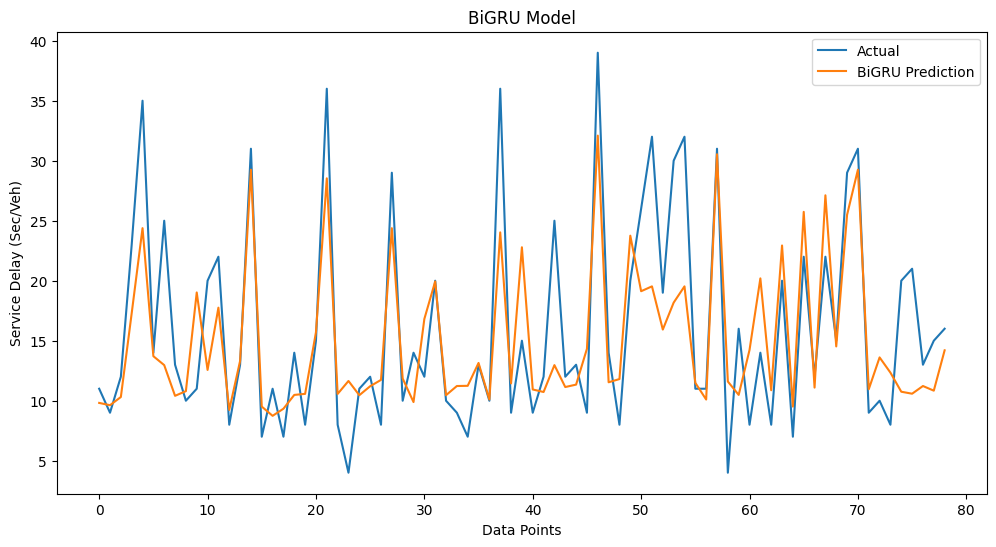

In [100]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [61]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)


Epoch 1/800
20/20 [==============================] - 0s 7ms/step - loss: 295.0747 - val_loss: 299.6140
Epoch 2/800
20/20 [==============================] - 0s 2ms/step - loss: 250.2858 - val_loss: 226.5636
Epoch 3/800
20/20 [==============================] - 0s 2ms/step - loss: 156.6943 - val_loss: 107.8494
Epoch 4/800
20/20 [==============================] - 0s 3ms/step - loss: 55.0558 - val_loss: 39.7040
Epoch 5/800
20/20 [==============================] - 0s 2ms/step - loss: 33.5692 - val_loss: 38.2162
Epoch 6/800
20/20 [==============================] - 0s 3ms/step - loss: 33.1628 - val_loss: 37.7877
Epoch 7/800
20/20 [==============================] - 0s 2ms/step - loss: 32.5841 - val_loss: 37.0024
Epoch 8/800
20/20 [==============================] - 0s 2ms/step - loss: 31.9536 - val_loss: 37.0403
Epoch 9/800
20/20 [==============================] - 0s 2ms/step - loss: 31.6064 - val_loss: 35.9764
Epoch 10/800
20/20 [==============================] - 0s 2ms/step - loss: 31.1405 - 

Visualize CNN results

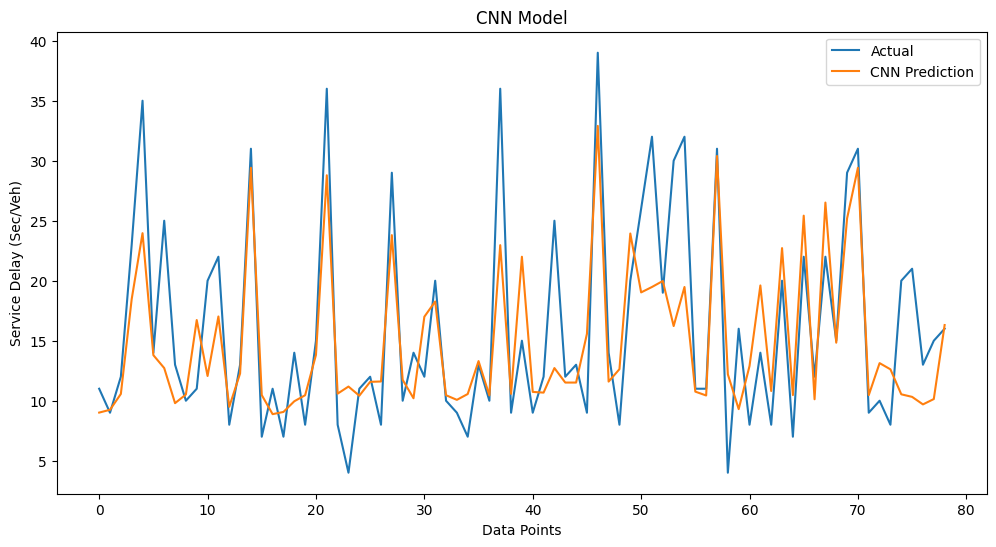

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [63]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
20/20 [==============================] - 1s 11ms/step - loss: 303.1301 - val_loss: 319.9755
Epoch 2/800
20/20 [==============================] - 0s 3ms/step - loss: 280.5639 - val_loss: 266.1060
Epoch 3/800
20/20 [==============================] - 0s 3ms/step - loss: 134.1279 - val_loss: 51.0514
Epoch 4/800
20/20 [==============================] - 0s 3ms/step - loss: 43.3846 - val_loss: 54.7205
Epoch 5/800
20/20 [==============================] - 0s 3ms/step - loss: 31.7859 - val_loss: 42.8307
Epoch 6/800
20/20 [==============================] - 0s 3ms/step - loss: 30.7278 - val_loss: 44.5497
Epoch 7/800
20/20 [==============================] - 0s 3ms/step - loss: 30.2141 - val_loss: 41.2208
Epoch 8/800
20/20 [==============================] - 0s 3ms/step - loss: 29.7768 - val_loss: 39.8693
Epoch 9/800
20/20 [==============================] - 0s 3ms/step - loss: 29.8272 - val_loss: 39.4548
Epoch 10/800
20/20 [==============================] - 0s 3ms/step - loss: 29.5138 - v

Visualize CNN_LSTM results

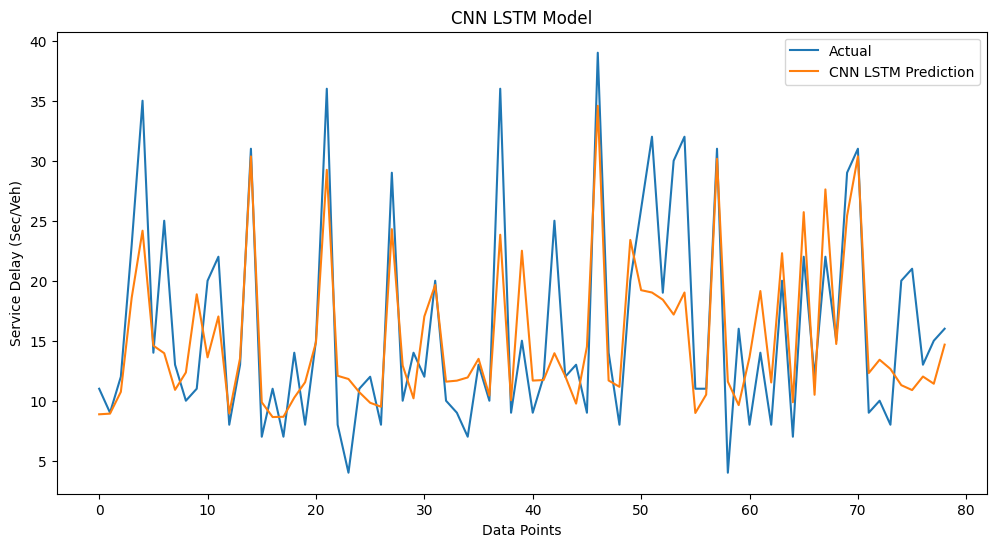

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [65]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/800
20/20 [==============================] - 2s 14ms/step - loss: 301.9319 - val_loss: 314.1396
Epoch 2/800
20/20 [==============================] - 0s 3ms/step - loss: 257.6690 - val_loss: 204.4892
Epoch 3/800
20/20 [==============================] - 0s 4ms/step - loss: 80.1411 - val_loss: 34.9741
Epoch 4/800
20/20 [==============================] - 0s 3ms/step - loss: 30.7944 - val_loss: 31.3001
Epoch 5/800
20/20 [==============================] - 0s 4ms/step - loss: 30.4569 - val_loss: 40.6550
Epoch 6/800
20/20 [==============================] - 0s 3ms/step - loss: 28.6980 - val_loss: 31.2852
Epoch 7/800
20/20 [==============================] - 0s 3ms/step - loss: 27.5254 - val_loss: 31.9082
Epoch 8/800
20/20 [==============================] - 0s 3ms/step - loss: 27.2350 - val_loss: 31.8160
Epoch 9/800
20/20 [==============================] - 0s 3ms/step - loss: 28.6262 - val_loss: 32.4917
Epoch 10/800
20/20 [==============================] - 0s 4ms/step - loss: 27.5040 - va

Visualize CNN_BiLSTM results

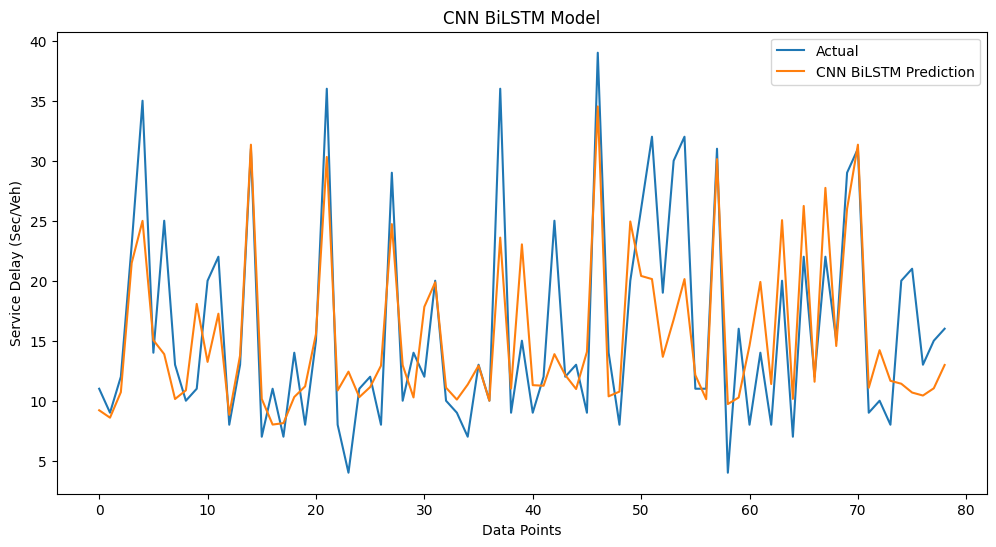

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [101]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

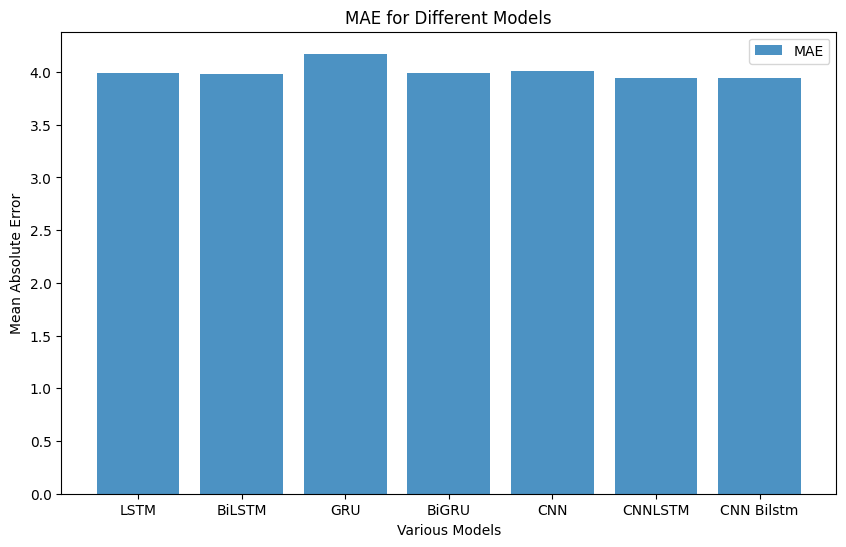

In [102]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

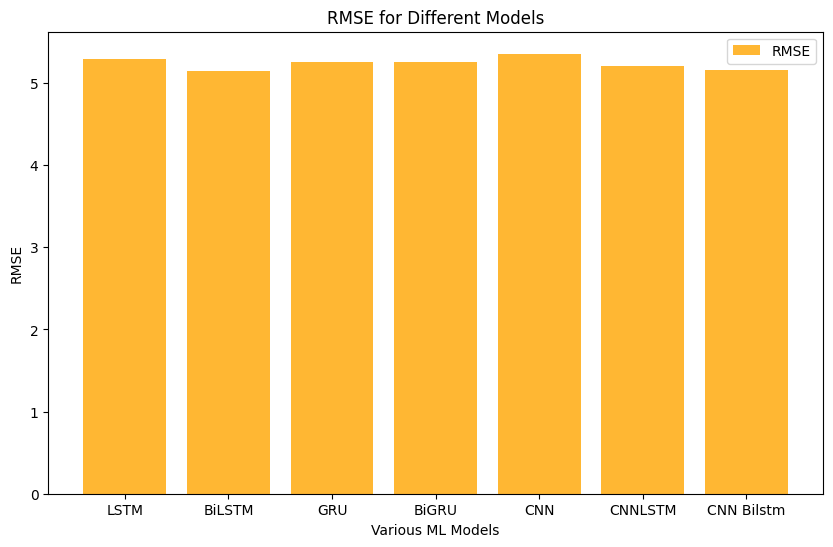

In [103]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

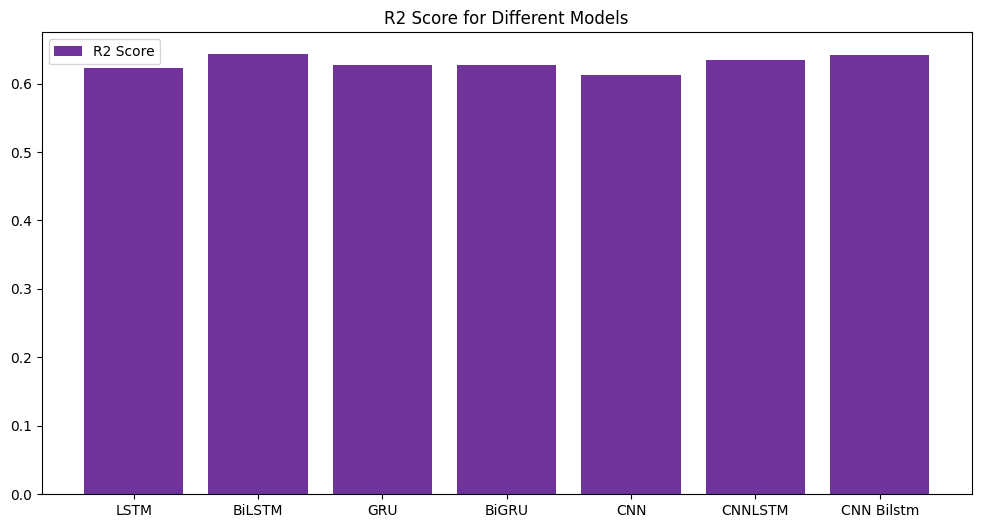

In [104]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [105]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 3.9882051250602624
LSTM MSE: 5.291817591211703
LSTM R2 Score: 0.6222864740894956

BiLSTM MAE: 3.9782917167567
BiLSTM MSE: 5.14687261802449
BiLSTM R2 Score: 0.6426945458765065

GRU MAE: 4.173110243640369
GRU MSE: 5.259054495063099
GRU R2 Score: 0.626949051981334

BiGRU MAE: 3.990719034701963
BiGRU MSE: 5.260741466539851
BiGRU R2 Score: 0.6267096830053162

CNN MAE: 4.006254437603528
CNN MSE: 5.355957894248516
CNN R2 Score: 0.6130747123065514

CNN LSTM MAE: 3.938368459291096
CNN LSTM MSE: 5.202607382105747
CNN LSTM R2 Score: 0.6349142251060477

CNN BiLSTM MAE: 3.9455452327486835
CNN BiLSTM MSE: 5.159309650715751
CNN BiLSTM R2 Score: 0.6409656557240804


In [106]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 3.9882051250602624
LSTM MSE: 5.291817591211703
LSTM R2 Score: 0.6222864740894956

BiLSTM MAE: 3.9782917167567
BiLSTM MSE: 5.14687261802449
BiLSTM R2 Score: 0.6426945458765065

GRU MAE: 4.173110243640369
GRU MSE: 5.259054495063099
GRU R2 Score: 0.626949051981334

BiGRU MAE: 3.990719034701963
BiGRU MSE: 5.260741466539851
BiGRU R2 Score: 0.6267096830053162

CNN MAE: 4.006254437603528
CNN MSE: 5.355957894248516
CNN R2 Score: 0.6130747123065514

CNN LSTM MAE: 3.938368459291096
CNN LSTM MSE: 5.202607382105747
CNN LSTM R2 Score: 0.6349142251060477

CNN BiLSTM MAE: 3.9455452327486835
CNN BiLSTM MSE: 5.159309650715751
CNN BiLSTM R2 Score: 0.6409656557240804


Plot predictions for each model

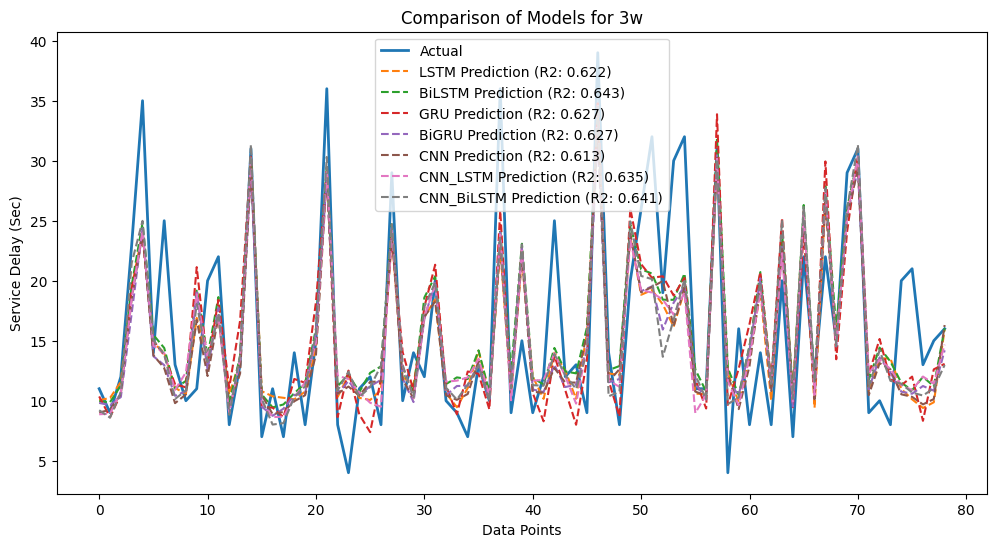

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for 3w')
plt.show()

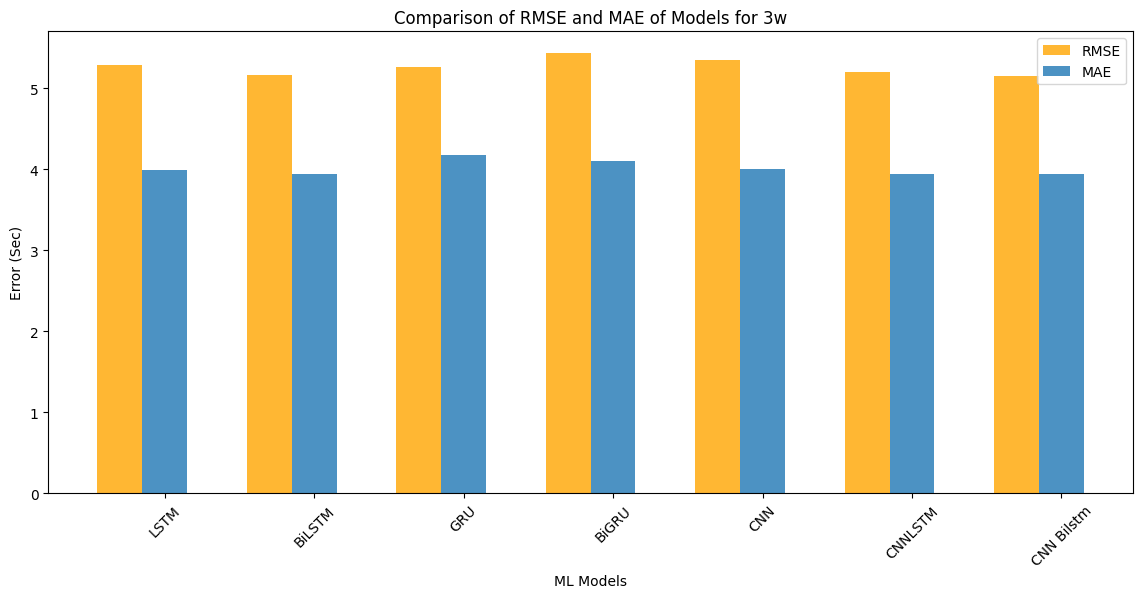

In [73]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for 3w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()